In [3]:
import pandas as pd
import seaborn as sns

## Explore the data

Suppose we want to predict `acceleration` given the other numerical characteristics of a car

In [4]:
df = pd.read_csv("../datasets/auto-mpg.csv")

In [6]:
df.shape

(398, 9)

In [7]:
df = df.drop("car name", axis=1)

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

Horsepower seems not to be a numeric column. What is going on?

In [12]:
for hp in df.horsepower:
    try:
        int(hp)
    except:
        print(hp)

?
?
?
?
?
?


In [13]:
# drop ? horsepowers
df = df[df.horsepower != "?"]

In [14]:
df.shape

(392, 8)

In [15]:
df.horsepower = df.horsepower.astype(float)

In [16]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [18]:
df.shape

(392, 8)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Build model with whole dataset

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
X = df.drop("acceleration", axis=1)
y = df.acceleration

In [22]:
X[:5]

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
2,18.0,8,318.0,150.0,3436,70,1
3,16.0,8,304.0,150.0,3433,70,1
4,17.0,8,302.0,140.0,3449,70,1


In [23]:
y[:5]

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
Name: acceleration, dtype: float64

In [24]:
lr.fit(X=X, y=y)

LinearRegression()

In [25]:
y[:1]

0    12.0
Name: acceleration, dtype: float64

In [26]:
lr.predict(X[:1])

array([14.00670318])

In [28]:
y[:5]

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
Name: acceleration, dtype: float64

In [30]:
lr.predict(X[:5]).round(1)

array([14. , 11.2, 12. , 12. , 13. ])

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mean_squared_error(y_true=y, y_pred=lr.predict(X))

2.8862752656774058

In [41]:
# r2 is the default score for LinearRegression
lr.score(X, y)

0.619822478208412

In [40]:
pd.DataFrame({"real": y, "pred": lr.predict(X).round(1)}).head()

,real,pred
0,12.0,14.0
1,11.5,11.2
2,11.0,12.0
3,12.0,12.0
4,10.5,13.0


<AxesSubplot:xlabel='acceleration'>

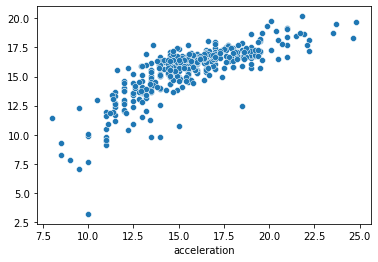

In [36]:
sns.scatterplot(x=y, y=lr.predict(X))

## Train-test split procedure

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df.shape

(392, 8)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [60]:
X_train.shape

(313, 7)

In [61]:
X_test.shape

(79, 7)

In [62]:
lr2 = LinearRegression()

In [63]:
lr2.fit(X_train, y_train)

LinearRegression()

In [64]:
lr2.score(X_train, y_train)

0.6400123165412906

<AxesSubplot:xlabel='acceleration'>

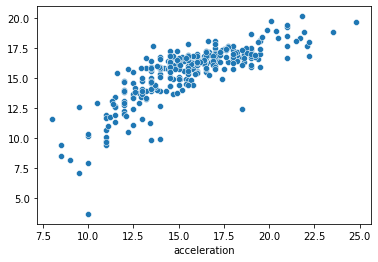

In [65]:
sns.scatterplot(x=y_train, y=lr2.predict(X_train))

In [66]:
X_test.shape

(79, 7)

In [67]:
X_test.head()

,mpg,cylinders,displacement,horsepower,weight,model year,origin
240,30.5,4,97.0,78.0,2190,77,2
390,32.0,4,144.0,96.0,2665,82,3
391,36.0,4,135.0,84.0,2370,82,1
236,25.5,4,140.0,89.0,2755,77,1
222,17.0,8,260.0,110.0,4060,77,1


In [68]:
lr2.predict(X_test.head()).round(1)

array([16.2, 15.8, 15.7, 16.8, 17.3])

In [69]:
y_test[:5]

240    14.1
390    13.9
391    13.0
236    15.8
222    19.0
Name: acceleration, dtype: float64

In [70]:
lr2.score(X_test, y_test)

0.48635667169188646

This is the expected error we will have when testing on OTHER UNSEEN cars

<AxesSubplot:xlabel='acceleration'>

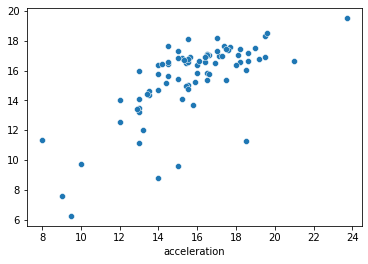

In [58]:
sns.scatterplot(x=y_test, y=lr2.predict(X_test))

EXTRA: CROSS VALIDATION to consider different train-test splits